In [1]:
import numpy as np
import ANN_feAux as TeacherFunc
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import time

dat = np.load('P1data.npy', allow_pickle=True) 
X = dat[:,:-1].astype(float) 
Y = dat[:, -1] 


In [2]:
np.random.shuffle(dat)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.14, random_state=21)

In [15]:
# print(dat.shape)
print(X_train.shape)
print(Y_train.shape)
print(type(Y_train))

(3440, 2)
(3440,)
<class 'numpy.ndarray'>


In [4]:
# make y train into one hot
Y_train[Y_train == 'A'] = 0
Y_train[Y_train == 'B'] = 1
Y_train[Y_train == 'C'] = 2
Y_train[Y_train == 'D'] = 3

Y_train_hot = TeacherFunc.onehot(Y_train.reshape((-1,1)).astype(int))

print(Y_train_hot.shape)

(3440, 4)


In [5]:
Y_train_hot

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In [6]:
# reload
import importlib
importlib.reload(TeacherFunc)

<module 'ANN_feAux' from 'c:\\Users\\meang\\Desktop\\ANNfinal\\FinalANNmeangpuDO\\ANN_feAux.py'>

sample: 0
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Time spent: 0.4082305431365967
All Accuracy

---------------------------------------------
LR1: 1 || LR2: 1 || HU: 4 || epochs: 400 || sample: 1
AVG accuracy = 480952.64%
Took 0.42 seconds


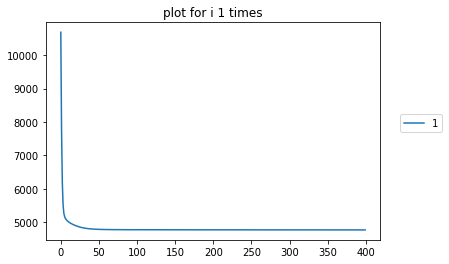

In [20]:
N, D = X_train.shape  # (3440, 2)
_, K = Y_train_hot.shape  # (3440, 4)

# number of HUs hidden unit (hyper-parameter), 
M = 4

lr1Mul= 1
lr2Mul= 1

sample = 1

all_t1 = time.time()

for i in range(sample):
    print(f"sample: {i}")

    epochs = 400

    # Biases and weights (parameters)
    c = np.random.normal(0, 1, K).reshape((K,1))   # 4*1
    v = np.random.normal(0, 1, K*M).reshape((K,M))  # 10*8
    b = np.random.normal(0, 1, M).reshape((M,1))  # 8*1
    w = np.random.normal(0, 1, M*D).reshape((M,D))  # 8*784

    lr1 = (1/N) * lr1Mul
    lr2 = (1/N) * lr2Mul

    oldy = Y_train_hot.astype(int)

    t1 = time.time()
    cc, vv, bb, ww, train_loss = TeacherFunc.train_mlp2(c, v, b, w, X_train, Y_train_hot, lr1, lr2, epochs, TeacherFunc.softmax, TeacherFunc.cc_entropy)
    t2 = time.time()

    print('Time spent:', t2 - t1)

    # save file
    net = {'c': cc, 'v': vv, 'b': bb, 'w': ww}
    np.save(f'{i}-{train_loss[-1]:.4f}', net)

    plt.plot(train_loss, label=i+1)
    plt.legend(bbox_to_anchor=(1.2, 0.6))
    plt.title(f'plot for i {sample} times')

all_t2 = time.time()
print("All Accuracy")
print()
print("---------------------------------------------")
print(f'LR1: {lr1Mul} || LR2: {lr2Mul} || HU: {M} || epochs: {epochs} || sample: {sample}')
print(f"AVG accuracy = {(np.average(train_loss))*100:.2f}%")
print(f'Took {all_t2 - all_t1:.2f} seconds')

In [ ]:
# Test network

Yp = TeacherFunc.mlp2(cc, vv, bb, ww, X_test, TeacherFunc.softmax)
predicted_classes = np.argmax(Yp, axis=1)

# test_acc = np.mean(predicted_classes == Y_test.astype(int))
# print('Test accuracy', test_acc)




#   plabs = P1_predict(X)
#   print(plabs)

#   acc = np.mean(plabs == Y)
#   print('Accuracy', acc)